# Foundations Of Data Science Project

### Data Processing(Cleaning, Selection, Transformation)

In [62]:
import pandas as pd
import xml.etree.ElementTree as ET

#Semi structured data
def xml_to_dataframe(xml_file):
    # parse the XML file
    tree = ET.parse(xml_file)
    root = tree.getroot()

    # extract data
    data = []
    for item in root.findall("./row"):
        record = {}
        for child in item:
            record[child.tag] = child.text
        data.append(record)

    # convert to DataFrame
    df = pd.DataFrame(data)
    return df


# example usage
xml_file = "real_time_air_quality_index.xml"
currentdf = xml_to_dataframe(xml_file)
display(currentdf)

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",16-09-2024 18:00:00,16.5150833,80.5181667,PM2.5,NA,NA,NA
1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",16-09-2024 18:00:00,16.5150833,80.5181667,NO2,4,19,9
2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",16-09-2024 18:00:00,16.5150833,80.5181667,SO2,15,19,17
3,India,Andhra_Pradesh,Anantapur,"Gulzarpet, Anantapur - APPCB",16-09-2024 18:00:00,14.675886,77.593027,NH3,4,4,4
4,India,Andhra_Pradesh,Anantapur,"Gulzarpet, Anantapur - APPCB",16-09-2024 18:00:00,14.675886,77.593027,CO,29,46,40
...,...,...,...,...,...,...,...,...,...,...,...
3316,India,West_Bengal,Kolkata,"Rabindra Bharati University, Kolkata - WBPCB",16-09-2024 18:00:00,22.627847,88.380669,OZONE,8,42,35
3317,India,West_Bengal,Kolkata,"Rabindra Sarobar, Kolkata - WBPCB",16-09-2024 18:00:00,22.51106,88.35142,CO,14,25,20
3318,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",16-09-2024 18:00:00,22.5448082,88.3403691,SO2,4,6,6
3319,India,West_Bengal,Siliguri,"Ward-32 Bapupara, Siliguri - WBPCB",16-09-2024 18:00:00,26.6879226,88.4152495,NO2,20,27,22


In [63]:
numeric_cols = ['pollutant_min', 'pollutant_max', 'pollutant_avg']
currentdf[numeric_cols] = currentdf[numeric_cols].apply(pd.to_numeric, errors='coerce')
display(currentdf)

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",16-09-2024 18:00:00,16.5150833,80.5181667,PM2.5,NaN,NaN,NaN
1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",16-09-2024 18:00:00,16.5150833,80.5181667,NO2,4.0,19.0,9.0
2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",16-09-2024 18:00:00,16.5150833,80.5181667,SO2,15.0,19.0,17.0
3,India,Andhra_Pradesh,Anantapur,"Gulzarpet, Anantapur - APPCB",16-09-2024 18:00:00,14.675886,77.593027,NH3,4.0,4.0,4.0
4,India,Andhra_Pradesh,Anantapur,"Gulzarpet, Anantapur - APPCB",16-09-2024 18:00:00,14.675886,77.593027,CO,29.0,46.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...
3316,India,West_Bengal,Kolkata,"Rabindra Bharati University, Kolkata - WBPCB",16-09-2024 18:00:00,22.627847,88.380669,OZONE,8.0,42.0,35.0
3317,India,West_Bengal,Kolkata,"Rabindra Sarobar, Kolkata - WBPCB",16-09-2024 18:00:00,22.51106,88.35142,CO,14.0,25.0,20.0
3318,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",16-09-2024 18:00:00,22.5448082,88.3403691,SO2,4.0,6.0,6.0
3319,India,West_Bengal,Siliguri,"Ward-32 Bapupara, Siliguri - WBPCB",16-09-2024 18:00:00,26.6879226,88.4152495,NO2,20.0,27.0,22.0


In [64]:
currentdf.drop(['latitude', 'longitude', 'last_update', 'country'], axis=1, inplace=True)
display(currentdf.head())

,state,city,station,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM2.5,NaN,NaN,NaN
1,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NO2,4.0,19.0,9.0
2,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",SO2,15.0,19.0,17.0
3,Andhra_Pradesh,Anantapur,"Gulzarpet, Anantapur - APPCB",NH3,4.0,4.0,4.0
4,Andhra_Pradesh,Anantapur,"Gulzarpet, Anantapur - APPCB",CO,29.0,46.0,40.0


In [65]:
def states(cur_df, df_21, df_22):
    s_22 = df_22['state'].unique().tolist()
    print(s_22)
    s_21 = df_21['state'].unique().tolist()
    print(s_21)
    s_cur = cur_df['state'].unique().tolist()
    print(s_cur)

    print(s_21 == s_22)
    print(s_21 == s_cur)

In [66]:
df_2021 = pd.read_csv('data_2021.csv', skiprows=2)
display(df_2021.head())

,State / Union Territory,City / town / village,Annual Average SO2,Annual Average NO2,Annual Average PM10,Annual Average PM2.5
0,Andhra Pradesh,Amaravati,14,12,55,28
1,Andhra Pradesh,Anatapur,7,16,64,30
2,Andhra Pradesh,Chittor,5,14,46,25
3,Andhra Pradesh,Eluru,5,17,63,30
4,Andhra Pradesh,Guntur,5,17,60,29


In [67]:
df_2021.rename(columns={'State / Union Territory ':'state', 'City / town / village ':'city', 'Annual Average SO2':'SO2_2021'}, inplace=True)
df_2021.rename(columns={'Annual Average NO2':'NO2_2021', 'Annual Average PM10':'PM10_2021', 'Annual Average PM2.5':'PM25_2021'}, inplace=True)
numeric_cols = ['SO2_2021', 'NO2_2021', 'PM10_2021', 'PM25_2021']
df_2021[numeric_cols] = df_2021[numeric_cols].apply(pd.to_numeric, errors='coerce')
display(df_2021.head())

,state,city,SO2_2021,NO2_2021,PM10_2021,PM25_2021
0,Andhra Pradesh,Amaravati,14.0,12.0,55.0,28.0
1,Andhra Pradesh,Anatapur,7.0,16.0,64.0,30.0
2,Andhra Pradesh,Chittor,5.0,14.0,46.0,25.0
3,Andhra Pradesh,Eluru,5.0,17.0,63.0,30.0
4,Andhra Pradesh,Guntur,5.0,17.0,60.0,29.0


In [68]:
states(currentdf, df_2021, df_2021)

['Andhra Pradesh ', 'Arunachal Pradesh ', 'Assam ', 'Bihar ', 'Chandigarh (UT) ', 'Chattisgarh ', 'Dadara & Nagar Haveli and Daman & Diu (UT) ', 'Delhi (UT) ', 'Goa ', 'Gujarat ', 'Haryana ', 'Himachal Pradesh ', 'Jammu & Kashmir (UT) ', 'Jharkhand ', 'Karnataka ', 'Kerala ', 'Madhya Pradesh ', 'Maharashtra ', 'Manipur ', 'Meghalaya ', 'Mizoram ', 'Nagaland ', 'Odisha ', 'Pondicherry (UT) ', 'Punjab ', 'Rajasthan ', 'Sikkim ', 'TamilNadu ', 'Telangana ', 'Tripura ', 'Uttar Pradesh ', 'Uttarakhand ', 'West Bengal ']
['Andhra Pradesh ', 'Arunachal Pradesh ', 'Assam ', 'Bihar ', 'Chandigarh (UT) ', 'Chattisgarh ', 'Dadara & Nagar Haveli and Daman & Diu (UT) ', 'Delhi (UT) ', 'Goa ', 'Gujarat ', 'Haryana ', 'Himachal Pradesh ', 'Jammu & Kashmir (UT) ', 'Jharkhand ', 'Karnataka ', 'Kerala ', 'Madhya Pradesh ', 'Maharashtra ', 'Manipur ', 'Meghalaya ', 'Mizoram ', 'Nagaland ', 'Odisha ', 'Pondicherry (UT) ', 'Punjab ', 'Rajasthan ', 'Sikkim ', 'TamilNadu ', 'Telangana ', 'Tripura ', 'Uttar P

In [69]:
df_2022 = pd.read_csv('data_2022.csv')
display(df_2022.head())

,Sr.No.,State / Union Territory,City / town,SO2 Annual Average,NO2 Annual Average,PM10 Annual Average,PM2.5 Annual Average
0,1,Andhra Pradesh,Amaravati,12,10,54,30
1,2,Andhra Pradesh,Anatapur,6,19,61,32
2,3,Andhra Pradesh,Chittor,5,13,55,31
3,4,Andhra Pradesh,Eluru,5,18,67,31
4,5,Andhra Pradesh,Guntur,4,17,60,23


In [70]:
df_2022.rename(columns={'State / Union Territory':'state', 'City / town':'city', 'SO2 Annual Average':'SO2_2022'}, inplace=True)
df_2022.rename(columns={'NO2 Annual Average':'NO2_2022', 'PM10 Annual Average':'PM10_2022', 'PM2.5 Annual Average':'PM25_2022'}, inplace=True)
df_2022.drop(columns='Sr.No.', inplace=True)
numeric_cols = ['SO2_2022', 'NO2_2022', 'PM10_2022', 'PM25_2022']
df_2022[numeric_cols] = df_2022[numeric_cols].apply(pd.to_numeric, errors='coerce')
display(df_2022.head())

,state,city,SO2_2022,NO2_2022,PM10_2022,PM25_2022
0,Andhra Pradesh,Amaravati,12.0,10.0,54.0,30.0
1,Andhra Pradesh,Anatapur,6.0,19.0,61.0,32.0
2,Andhra Pradesh,Chittor,5.0,13.0,55.0,31.0
3,Andhra Pradesh,Eluru,5.0,18.0,67.0,31.0
4,Andhra Pradesh,Guntur,4.0,17.0,60.0,23.0


In [71]:
states(currentdf, df_2021, df_2022)

['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh (UT)', 'Chattisgarh', 'Dadara & Nagar Haveli and Daman & Diu (UT)', 'Delhi (UT)', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir (UT)', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Pondicherry (UT)', 'Punjab', 'Rajasthan', 'Sikkim', 'TamilNadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']
['Andhra Pradesh ', 'Arunachal Pradesh ', 'Assam ', 'Bihar ', 'Chandigarh (UT) ', 'Chattisgarh ', 'Dadara & Nagar Haveli and Daman & Diu (UT) ', 'Delhi (UT) ', 'Goa ', 'Gujarat ', 'Haryana ', 'Himachal Pradesh ', 'Jammu & Kashmir (UT) ', 'Jharkhand ', 'Karnataka ', 'Kerala ', 'Madhya Pradesh ', 'Maharashtra ', 'Manipur ', 'Meghalaya ', 'Mizoram ', 'Nagaland ', 'Odisha ', 'Pondicherry (UT) ', 'Punjab ', 'Rajasthan ', 'Sikkim ', 'TamilNadu ', 'Telangana ', 'Tripura ', 'Uttar Pradesh ', 'Uttarakhand ', 'West B

In [72]:
#cleaning state names
df_2021['state'] = df_2021['state'].str.replace(" ", "_")
df_2021['state'] = df_2021['state'].str.rstrip('_')
df_2021['state'] = df_2021['state'].str.replace("Pondicherry_(UT)", "Puducherry_(UT)")
display(df_2021.head())

,state,city,SO2_2021,NO2_2021,PM10_2021,PM25_2021
0,Andhra_Pradesh,Amaravati,14.0,12.0,55.0,28.0
1,Andhra_Pradesh,Anatapur,7.0,16.0,64.0,30.0
2,Andhra_Pradesh,Chittor,5.0,14.0,46.0,25.0
3,Andhra_Pradesh,Eluru,5.0,17.0,63.0,30.0
4,Andhra_Pradesh,Guntur,5.0,17.0,60.0,29.0


In [73]:
#cleaning state names
df_2022['state'] = df_2022['state'].str.replace(" ", "_")
df_2022['state'] = df_2022['state'].str.rstrip('_')
df_2022['state'] = df_2022['state'].str.replace("Pondicherry_(UT)", "Puducherry_(UT)")
display(df_2022.head())

,state,city,SO2_2022,NO2_2022,PM10_2022,PM25_2022
0,Andhra_Pradesh,Amaravati,12.0,10.0,54.0,30.0
1,Andhra_Pradesh,Anatapur,6.0,19.0,61.0,32.0
2,Andhra_Pradesh,Chittor,5.0,13.0,55.0,31.0
3,Andhra_Pradesh,Eluru,5.0,18.0,67.0,31.0
4,Andhra_Pradesh,Guntur,4.0,17.0,60.0,23.0


In [74]:
states(currentdf, df_2021, df_2022)

['Andhra_Pradesh', 'Arunachal_Pradesh', 'Assam', 'Bihar', 'Chandigarh_(UT)', 'Chattisgarh', 'Dadara_&_Nagar_Haveli_and_Daman_&_Diu_(UT)', 'Delhi_(UT)', 'Goa', 'Gujarat', 'Haryana', 'Himachal_Pradesh', 'Jammu_&_Kashmir_(UT)', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya_Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry_(UT)', 'Punjab', 'Rajasthan', 'Sikkim', 'TamilNadu', 'Telangana', 'Tripura', 'Uttar_Pradesh', 'Uttarakhand', 'West_Bengal']
['Andhra_Pradesh', 'Arunachal_Pradesh', 'Assam', 'Bihar', 'Chandigarh_(UT)', 'Chattisgarh', 'Dadara_&_Nagar_Haveli_and_Daman_&_Diu_(UT)', 'Delhi_(UT)', 'Goa', 'Gujarat', 'Haryana', 'Himachal_Pradesh', 'Jammu_&_Kashmir_(UT)', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya_Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry_(UT)', 'Punjab', 'Rajasthan', 'Sikkim', 'TamilNadu', 'Telangana', 'Tripura', 'Uttar_Pradesh', 'Uttarakhand', 'West_Bengal']
['Andhra_Pradesh', 'Arunac

In [75]:
currentdf['state'] = currentdf['state'].str.replace(" ", "_")
currentdf['state'] = currentdf['state'].str.rstrip('_')
currentdf['state'] = currentdf['state'].str.replace('Chandigarh', 'Chandigarh_(UT)')
currentdf['state'] = currentdf['state'].str.replace('Chhattisgarh', 'Chattisgarh')
currentdf['state'] = currentdf['state'].str.replace('Delhi', 'Delhi_(UT)')
currentdf['state'] = currentdf['state'].str.replace('Jammu_and_Kashmir', 'Jammu_&_Kashmir_(UT)')
currentdf['state'] = currentdf['state'].str.replace('Puducherry', 'Puducherry_(UT)')
states(currentdf, df_2021, df_2022)

['Andhra_Pradesh', 'Arunachal_Pradesh', 'Assam', 'Bihar', 'Chandigarh_(UT)', 'Chattisgarh', 'Dadara_&_Nagar_Haveli_and_Daman_&_Diu_(UT)', 'Delhi_(UT)', 'Goa', 'Gujarat', 'Haryana', 'Himachal_Pradesh', 'Jammu_&_Kashmir_(UT)', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya_Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry_(UT)', 'Punjab', 'Rajasthan', 'Sikkim', 'TamilNadu', 'Telangana', 'Tripura', 'Uttar_Pradesh', 'Uttarakhand', 'West_Bengal']
['Andhra_Pradesh', 'Arunachal_Pradesh', 'Assam', 'Bihar', 'Chandigarh_(UT)', 'Chattisgarh', 'Dadara_&_Nagar_Haveli_and_Daman_&_Diu_(UT)', 'Delhi_(UT)', 'Goa', 'Gujarat', 'Haryana', 'Himachal_Pradesh', 'Jammu_&_Kashmir_(UT)', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya_Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry_(UT)', 'Punjab', 'Rajasthan', 'Sikkim', 'TamilNadu', 'Telangana', 'Tripura', 'Uttar_Pradesh', 'Uttarakhand', 'West_Bengal']
['Andhra_Pradesh', 'Arunac

So state in both df_2021, df_2022 are in sync

#### SQLite

Normalisation

In [76]:
import sqlite3
conn = sqlite3.connect('project.db', timeout=30)
c = conn.cursor()

In [77]:
#Storing data in sql database
currentdf.to_sql('currentdf', conn, if_exists='replace', index=False)
conn.commit()
df_2021.to_sql('df_2021', conn, if_exists='replace', index=False)
conn.commit()
df_2022.to_sql('df_2022', conn, if_exists='replace', index=False)
conn.commit()

In [78]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [79]:
%sql sqlite:///project.db

_First Normal Form (1NF)_  
No Multivalue attribute  
Composite Primary Key - (station, pollutant_id)

*Second Normal Form*  
Functional Dependencies: (station, pollutant_id) -> pollutant_min, pollutant_max, pollutant_avg

In [80]:
%%sql
CREATE TABLE IF NOT EXISTS nor_currentdf (
  station text NOT NULL,
  pollutant_id text NOT NULL,
  pollutant_min float,
  pollutant_max float,
  pollutant_avg float,
  PRIMARY KEY  ('station', 'pollutant_id'));
INSERT OR IGNORE INTO nor_currentdf (station, pollutant_id, pollutant_min, pollutant_max, pollutant_avg) 
SELECT station, pollutant_id, pollutant_min, pollutant_max, pollutant_avg FROM currentdf;

SELECT * FROM sqlite_master WHERE type='table';

 * sqlite:///project.db
Done.
0 rows affected.
Done.


type,name,tbl_name,rootpage,sql
table,nor_currentdf,nor_currentdf,69,"CREATE TABLE nor_currentdf ( station text NOT NULL, pollutant_id text NOT NULL, pollutant_min float, pollutant_max float, pollutant_avg float, PRIMARY KEY ('station', 'pollutant_id'))"
table,state_city,state_city,150,"CREATE TABLE state_city ( city text NOT NULL, state text NOT NULL)"
table,city_station,city_station,153,"CREATE TABLE city_station( city text NOT NULL, station text NOT NULL)"
table,avg_cur_df,avg_cur_df,160,"CREATE TABLE ""avg_cur_df"" (""state"" TEXT, ""CO_cur"" REAL, ""NH3_cur"" REAL, ""NO2_cur"" REAL, ""OZONE_cur"" REAL, ""PM10_cur"" REAL, ""PM25_cur"" REAL, ""SO2_cur"" REAL)"
table,avg_df_2021,avg_df_2021,161,"CREATE TABLE ""avg_df_2021"" (""state"" TEXT, ""SO2_2021"" REAL, ""NO2_2021"" REAL, ""PM10_2021"" REAL, ""PM25_2021"" REAL)"
table,avg_df_2022,avg_df_2022,162,"CREATE TABLE ""avg_df_2022"" (""state"" TEXT, ""SO2_2022"" REAL, ""NO2_2022"" REAL, ""PM10_2022"" REAL, ""PM25_2022"" REAL)"
table,min_cur_df,min_cur_df,163,"CREATE TABLE ""min_cur_df"" (""state"" TEXT, ""CO"" REAL, ""NH3"" REAL, ""NO2"" REAL, ""OZONE"" REAL, ""PM10"" REAL, ""PM25"" REAL, ""SO2"" REAL)"
table,max_cur_df,max_cur_df,164,"CREATE TABLE ""max_cur_df"" (""state"" TEXT, ""CO"" REAL, ""NH3"" REAL, ""NO2"" REAL, ""OZONE"" REAL, ""PM10"" REAL, ""PM25"" REAL, ""SO2"" REAL)"
table,currentdf,currentdf,2,"CREATE TABLE ""currentdf"" (""state"" TEXT, ""city"" TEXT, ""station"" TEXT, ""pollutant_id"" TEXT, ""pollutant_min"" REAL, ""pollutant_max"" REAL, ""pollutant_avg"" REAL)"
table,df_2021,df_2021,59,"CREATE TABLE ""df_2021"" (""state"" TEXT, ""city"" TEXT, ""SO2_2021"" REAL, ""NO2_2021"" REAL, ""PM10_2021"" REAL, ""PM25_2021"" REAL)"


*Third Normal Form*  
Transitive Dependency: state -> city, city -> station

In [81]:
%%sql

CREATE TABLE IF NOT EXISTS state_city (
  city text NOT NULL,
  state text NOT NULL);
INSERT OR IGNORE INTO state_city (city, state) 
SELECT DISTINCT city, state FROM currentdf;

CREATE TABLE IF NOT EXISTS city_station(
  city text NOT NULL,
  station text NOT NULL);
INSERT OR IGNORE INTO city_station (city, station) 
SELECT DISTINCT city, station FROM currentdf;

SELECT * FROM sqlite_master WHERE type='table';

 * sqlite:///project.db
Done.
266 rows affected.
Done.
498 rows affected.
Done.


type,name,tbl_name,rootpage,sql
table,nor_currentdf,nor_currentdf,69,"CREATE TABLE nor_currentdf ( station text NOT NULL, pollutant_id text NOT NULL, pollutant_min float, pollutant_max float, pollutant_avg float, PRIMARY KEY ('station', 'pollutant_id'))"
table,state_city,state_city,150,"CREATE TABLE state_city ( city text NOT NULL, state text NOT NULL)"
table,city_station,city_station,153,"CREATE TABLE city_station( city text NOT NULL, station text NOT NULL)"
table,avg_cur_df,avg_cur_df,160,"CREATE TABLE ""avg_cur_df"" (""state"" TEXT, ""CO_cur"" REAL, ""NH3_cur"" REAL, ""NO2_cur"" REAL, ""OZONE_cur"" REAL, ""PM10_cur"" REAL, ""PM25_cur"" REAL, ""SO2_cur"" REAL)"
table,avg_df_2021,avg_df_2021,161,"CREATE TABLE ""avg_df_2021"" (""state"" TEXT, ""SO2_2021"" REAL, ""NO2_2021"" REAL, ""PM10_2021"" REAL, ""PM25_2021"" REAL)"
table,avg_df_2022,avg_df_2022,162,"CREATE TABLE ""avg_df_2022"" (""state"" TEXT, ""SO2_2022"" REAL, ""NO2_2022"" REAL, ""PM10_2022"" REAL, ""PM25_2022"" REAL)"
table,min_cur_df,min_cur_df,163,"CREATE TABLE ""min_cur_df"" (""state"" TEXT, ""CO"" REAL, ""NH3"" REAL, ""NO2"" REAL, ""OZONE"" REAL, ""PM10"" REAL, ""PM25"" REAL, ""SO2"" REAL)"
table,max_cur_df,max_cur_df,164,"CREATE TABLE ""max_cur_df"" (""state"" TEXT, ""CO"" REAL, ""NH3"" REAL, ""NO2"" REAL, ""OZONE"" REAL, ""PM10"" REAL, ""PM25"" REAL, ""SO2"" REAL)"
table,currentdf,currentdf,2,"CREATE TABLE ""currentdf"" (""state"" TEXT, ""city"" TEXT, ""station"" TEXT, ""pollutant_id"" TEXT, ""pollutant_min"" REAL, ""pollutant_max"" REAL, ""pollutant_avg"" REAL)"
table,df_2021,df_2021,59,"CREATE TABLE ""df_2021"" (""state"" TEXT, ""city"" TEXT, ""SO2_2021"" REAL, ""NO2_2021"" REAL, ""PM10_2021"" REAL, ""PM25_2021"" REAL)"


In [82]:
%%sql
SELECT * FROM nor_currentdf LIMIT 15;

 * sqlite:///project.db
Done.


station,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
"Secretariat, Amaravati - APPCB",PM2.5,None,None,None
"Secretariat, Amaravati - APPCB",NO2,4.0,19.0,9.0
"Secretariat, Amaravati - APPCB",SO2,15.0,19.0,17.0
"Gulzarpet, Anantapur - APPCB",NH3,4.0,4.0,4.0
"Gulzarpet, Anantapur - APPCB",CO,29.0,46.0,40.0
"Gulzarpet, Anantapur - APPCB",OZONE,7.0,44.0,31.0
"Gangineni Cheruvu, Chittoor - APPCB",NO2,8.0,9.0,9.0
"Yerramukkapalli, Kadapa - APPCB",NO2,None,None,None
"Yerramukkapalli, Kadapa - APPCB",NH3,None,None,None
"Anand Kala Kshetram, Rajamahendravaram - APPCB",PM2.5,27.0,46.0,35.0


In [83]:
%%sql
SELECT * FROM state_city LIMIT 15;

 * sqlite:///project.db
Done.


city,state
Amaravati,Andhra_Pradesh
Anantapur,Andhra_Pradesh
Chittoor,Andhra_Pradesh
Kadapa,Andhra_Pradesh
Rajamahendravaram,Andhra_Pradesh
Tirupati,Andhra_Pradesh
Vijayawada,Andhra_Pradesh
Visakhapatnam,Andhra_Pradesh
Naharlagun,Arunachal_Pradesh
Byrnihat,Assam


In [84]:
%%sql
SELECT * FROM city_station LIMIT 15;

 * sqlite:///project.db
Done.


city,station
Amaravati,"Secretariat, Amaravati - APPCB"
Anantapur,"Gulzarpet, Anantapur - APPCB"
Chittoor,"Gangineni Cheruvu, Chittoor - APPCB"
Kadapa,"Yerramukkapalli, Kadapa - APPCB"
Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB"
Tirupati,"Tirumala, Tirupati - APPCB"
Tirupati,"Vaikuntapuram, Tirupati - APPCB"
Vijayawada,"HB Colony, Vijayawada - APPCB"
Vijayawada,"Kanuru, Vijayawada - APPCB"
Vijayawada,"Rajiv Gandhi Park, Vijayawada - APPCB"


SO THE DATA IS NORMALIZED TO 3NF

In [85]:
avg_df_2021 = df_2021.drop(columns=['city'])
display(avg_df_2021.head())

,state,SO2_2021,NO2_2021,PM10_2021,PM25_2021
0,Andhra_Pradesh,14.0,12.0,55.0,28.0
1,Andhra_Pradesh,7.0,16.0,64.0,30.0
2,Andhra_Pradesh,5.0,14.0,46.0,25.0
3,Andhra_Pradesh,5.0,17.0,63.0,30.0
4,Andhra_Pradesh,5.0,17.0,60.0,29.0


In [86]:
avg_df_2021 = avg_df_2021.groupby('state').mean().reset_index()
display(avg_df_2021.head())


,state,SO2_2021,NO2_2021,PM10_2021,PM25_2021
0,Andhra_Pradesh,7.125000,17.562500,63.000000,28.250000
1,Arunachal_Pradesh,15.000000,5.500000,60.500000,15.000000
2,Assam,7.538462,12.076923,63.461538,46.333333
3,Bihar,7.500000,19.250000,129.750000,66.250000
4,Chandigarh_(UT),6.000000,24.000000,98.000000,49.000000


In [87]:
avg_df_2022 = df_2022.drop(columns=['city'])
display(avg_df_2022.head())

,state,SO2_2022,NO2_2022,PM10_2022,PM25_2022
0,Andhra_Pradesh,12.0,10.0,54.0,30.0
1,Andhra_Pradesh,6.0,19.0,61.0,32.0
2,Andhra_Pradesh,5.0,13.0,55.0,31.0
3,Andhra_Pradesh,5.0,18.0,67.0,31.0
4,Andhra_Pradesh,4.0,17.0,60.0,23.0


In [88]:
avg_df_2022 = avg_df_2022.groupby('state').mean().reset_index()
display(avg_df_2022.head())

,state,SO2_2022,NO2_2022,PM10_2022,PM25_2022
0,Andhra_Pradesh,6.875000,17.875,64.750000,28.937500
1,Arunachal_Pradesh,15.000000,11.500,57.500000,23.000000
2,Assam,6.642857,12.500,71.357143,33.846154
3,Bihar,7.560000,36.200,176.840000,84.600000
4,Chandigarh_(UT),7.000000,27.000,113.000000,57.000000


In [89]:
polinfo_df=currentdf.value_counts('pollutant_id')
display(polinfo_df)

pollutant_id
PM10     487
PM2.5    486
CO       484
NO2      484
SO2      475
OZONE    472
NH3      433
Name: count, dtype: int64

In [90]:
avg_cur_df = currentdf.copy()
display(avg_cur_df.head())

,state,city,station,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM2.5,NaN,NaN,NaN
1,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NO2,4.0,19.0,9.0
2,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",SO2,15.0,19.0,17.0
3,Andhra_Pradesh,Anantapur,"Gulzarpet, Anantapur - APPCB",NH3,4.0,4.0,4.0
4,Andhra_Pradesh,Anantapur,"Gulzarpet, Anantapur - APPCB",CO,29.0,46.0,40.0


In [91]:
#removed noisy columns
avg_cur_df.drop(columns=['pollutant_min', 'pollutant_max'], inplace=True)
display(avg_cur_df.head())

,state,city,station,pollutant_id,pollutant_avg
0,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM2.5,NaN
1,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NO2,9.0
2,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",SO2,17.0
3,Andhra_Pradesh,Anantapur,"Gulzarpet, Anantapur - APPCB",NH3,4.0
4,Andhra_Pradesh,Anantapur,"Gulzarpet, Anantapur - APPCB",CO,40.0


In [92]:
avg_cur_df = avg_cur_df[['state', 'pollutant_id', 'pollutant_avg']].groupby(['state', 'pollutant_id']).mean()
display(avg_cur_df)

pollutant_avg
state          pollutant_id               
Andhra_Pradesh CO                28.111111
               NH3                2.857143
               NO2               15.857143
               OZONE             25.375000
               PM10              61.600000
...                                    ...
West_Bengal    NO2               25.684211
               OZONE             24.333333
               PM10              37.666667
               PM2.5             30.333333
               SO2                8.571429

[211 rows x 1 columns]

In [93]:
avg_cur_df = avg_cur_df.unstack()
display(avg_cur_df.head())

pollutant_avg                                             \
pollutant_id                 CO       NH3        NO2      OZONE       PM10   
state                                                                        
Andhra_Pradesh        28.111111  2.857143  15.857143  25.375000  61.600000   
Arunachal_Pradesh     10.000000       NaN   3.000000   3.000000  32.000000   
Assam                 28.500000  1.400000   8.333333  14.333333  57.833333   
Bihar                 38.656250  5.038462  13.206897  25.781250  45.523810   
Chandigarh_(UT)       34.666667  7.500000  18.000000  46.666667  59.000000   

                                         
pollutant_id           PM2.5        SO2  
state                                    
Andhra_Pradesh     49.250000   9.833333  
Arunachal_Pradesh  27.000000   5.000000  
Assam              57.800000   6.500000  
Bihar              32.333333  10.034483  
Chandigarh_(UT)    40.000000   9.000000

In [94]:
avg_cur_df.reset_index()
avg_cur_df.columns=['CO_cur', 'NH3_cur', 'NO2_cur', 'OZONE_cur', 'PM10_cur', 'PM25_cur', 'SO2_cur']
avg_cur_df.dropna(inplace=True)
avg_cur_df.reset_index(inplace=True)
display(avg_cur_df)

,state,CO_cur,NH3_cur,NO2_cur,OZONE_cur,PM10_cur,PM25_cur,SO2_cur
0,Andhra_Pradesh,28.111111,2.857143,15.857143,25.375000,61.600000,49.250000,9.833333
1,Assam,28.500000,1.400000,8.333333,14.333333,57.833333,57.800000,6.500000
2,Bihar,38.656250,5.038462,13.206897,25.781250,45.523810,32.333333,10.034483
3,Chandigarh_(UT),34.666667,7.500000,18.000000,46.666667,59.000000,40.000000,9.000000
4,Chattisgarh,23.846154,3.272727,12.727273,15.000000,38.636364,27.900000,9.846154
5,Delhi_(UT),38.216216,6.967742,36.166667,34.162162,134.694444,85.085714,13.032258
6,Gujarat,23.818182,3.636364,25.454545,30.416667,72.090909,60.000000,11.636364
7,Haryana,30.925926,9.263158,19.347826,34.481481,76.578947,68.318182,17.260870
8,Himachal_Pradesh,23.000000,4.000000,18.000000,96.000000,81.000000,59.000000,21.000000
9,Karnataka,30.878049,2.843750,16.617647,22.081081,40.648649,28.828571,13.027027


In [95]:
avg_cur_df.to_sql('avg_cur_df', conn, if_exists='replace', index=False)
avg_df_2021.to_sql('avg_df_2021', conn, if_exists='replace', index=False)
avg_df_2022.to_sql('avg_df_2022', conn, if_exists='replace', index=False)
conn.commit()
display(pd.read_sql_query('SELECT * FROM avg_cur_df', conn).head())
display(pd.read_sql_query('SELECT * FROM avg_df_2021', conn).head())
display(pd.read_sql_query('SELECT * FROM avg_df_2022', conn).head())

,state,CO_cur,NH3_cur,NO2_cur,OZONE_cur,PM10_cur,PM25_cur,SO2_cur
0,Andhra_Pradesh,28.111111,2.857143,15.857143,25.375000,61.600000,49.250000,9.833333
1,Assam,28.500000,1.400000,8.333333,14.333333,57.833333,57.800000,6.500000
2,Bihar,38.656250,5.038462,13.206897,25.781250,45.523810,32.333333,10.034483
3,Chandigarh_(UT),34.666667,7.500000,18.000000,46.666667,59.000000,40.000000,9.000000
4,Chattisgarh,23.846154,3.272727,12.727273,15.000000,38.636364,27.900000,9.846154


,state,SO2_2021,NO2_2021,PM10_2021,PM25_2021
0,Andhra_Pradesh,7.125000,17.562500,63.000000,28.250000
1,Arunachal_Pradesh,15.000000,5.500000,60.500000,15.000000
2,Assam,7.538462,12.076923,63.461538,46.333333
3,Bihar,7.500000,19.250000,129.750000,66.250000
4,Chandigarh_(UT),6.000000,24.000000,98.000000,49.000000


,state,SO2_2022,NO2_2022,PM10_2022,PM25_2022
0,Andhra_Pradesh,6.875000,17.875,64.750000,28.937500
1,Arunachal_Pradesh,15.000000,11.500,57.500000,23.000000
2,Assam,6.642857,12.500,71.357143,33.846154
3,Bihar,7.560000,36.200,176.840000,84.600000
4,Chandigarh_(UT),7.000000,27.000,113.000000,57.000000


In [96]:
display(pd.read_sql_query("SELECT state FROM avg_cur_df WHERE state NOT IN (SELECT state FROM avg_df_2021);", conn))
display(pd.read_sql_query("SELECT state FROM avg_df_2021 WHERE state NOT IN (SELECT state FROM avg_cur_df);", conn))

,state


,state
0,Arunachal_Pradesh
1,Dadara_&_Nagar_Haveli_and_Daman_&_Diu_(UT)
2,Goa
3,Jammu_&_Kashmir_(UT)
4,Jharkhand
5,Manipur
6,Meghalaya
7,Mizoram
8,Sikkim
9,Tripura


info related to all states of mod_cur_df is available in mod_df_2021, mod_df_2022.
But not vice versa.
We can only work with the data which is available from all three dataframes

In [97]:
#removing unwanted records
c.execute("DELETE FROM avg_df_2021 WHERE state NOT IN (SELECT state FROM avg_cur_df);")
c.execute("DELETE FROM avg_df_2022 WHERE state NOT IN (SELECT state FROM avg_cur_df);")
conn.commit()
avg_df_2021 = pd.read_sql_query('SELECT * FROM avg_df_2021', conn)
avg_df_2022 = pd.read_sql_query('SELECT * FROM avg_df_2022', conn)

In [98]:
display(avg_cur_df)
display(avg_df_2021)
display(avg_df_2022)

,state,CO_cur,NH3_cur,NO2_cur,OZONE_cur,PM10_cur,PM25_cur,SO2_cur
0,Andhra_Pradesh,28.111111,2.857143,15.857143,25.375000,61.600000,49.250000,9.833333
1,Assam,28.500000,1.400000,8.333333,14.333333,57.833333,57.800000,6.500000
2,Bihar,38.656250,5.038462,13.206897,25.781250,45.523810,32.333333,10.034483
3,Chandigarh_(UT),34.666667,7.500000,18.000000,46.666667,59.000000,40.000000,9.000000
4,Chattisgarh,23.846154,3.272727,12.727273,15.000000,38.636364,27.900000,9.846154
5,Delhi_(UT),38.216216,6.967742,36.166667,34.162162,134.694444,85.085714,13.032258
6,Gujarat,23.818182,3.636364,25.454545,30.416667,72.090909,60.000000,11.636364
7,Haryana,30.925926,9.263158,19.347826,34.481481,76.578947,68.318182,17.260870
8,Himachal_Pradesh,23.000000,4.000000,18.000000,96.000000,81.000000,59.000000,21.000000
9,Karnataka,30.878049,2.843750,16.617647,22.081081,40.648649,28.828571,13.027027


,state,SO2_2021,NO2_2021,PM10_2021,PM25_2021
0,Andhra_Pradesh,7.125000,17.562500,63.000000,28.250000
1,Assam,7.538462,12.076923,63.461538,46.333333
2,Bihar,7.500000,19.250000,129.750000,66.250000
3,Chandigarh_(UT),6.000000,24.000000,98.000000,49.000000
4,Chattisgarh,9.000000,16.000000,64.000000,30.500000
5,Delhi_(UT),10.000000,42.000000,207.000000,107.000000
6,Gujarat,17.000000,23.916667,110.750000,40.916667
7,Haryana,12.583333,25.250000,162.000000,71.041667
8,Himachal_Pradesh,2.272727,8.454545,71.818182,28.454545
9,Karnataka,10.884615,15.807692,53.384615,25.240000


,state,SO2_2022,NO2_2022,PM10_2022,PM25_2022
0,Andhra_Pradesh,6.875000,17.875000,64.750000,28.937500
1,Assam,6.642857,12.500000,71.357143,33.846154
2,Bihar,7.560000,36.200000,176.840000,84.600000
3,Chandigarh_(UT),7.000000,27.000000,113.000000,57.000000
4,Chattisgarh,10.200000,15.600000,65.600000,28.750000
5,Delhi_(UT),9.000000,41.000000,207.000000,98.000000
6,Gujarat,19.200000,21.300000,104.200000,44.400000
7,Haryana,11.875000,21.583333,150.090909,68.166667
8,Himachal_Pradesh,3.727273,8.727273,67.090909,28.181818
9,Karnataka,13.629630,15.333333,59.555556,26.625000


In [99]:
states(avg_cur_df, avg_df_2021, avg_df_2022)

['Andhra_Pradesh', 'Assam', 'Bihar', 'Chandigarh_(UT)', 'Chattisgarh', 'Delhi_(UT)', 'Gujarat', 'Haryana', 'Himachal_Pradesh', 'Karnataka', 'Kerala', 'Madhya_Pradesh', 'Maharashtra', 'Nagaland', 'Odisha', 'Puducherry_(UT)', 'Punjab', 'Rajasthan', 'TamilNadu', 'Telangana', 'Uttar_Pradesh', 'Uttarakhand', 'West_Bengal']
['Andhra_Pradesh', 'Assam', 'Bihar', 'Chandigarh_(UT)', 'Chattisgarh', 'Delhi_(UT)', 'Gujarat', 'Haryana', 'Himachal_Pradesh', 'Karnataka', 'Kerala', 'Madhya_Pradesh', 'Maharashtra', 'Nagaland', 'Odisha', 'Puducherry_(UT)', 'Punjab', 'Rajasthan', 'TamilNadu', 'Telangana', 'Uttar_Pradesh', 'Uttarakhand', 'West_Bengal']
['Andhra_Pradesh', 'Assam', 'Bihar', 'Chandigarh_(UT)', 'Chattisgarh', 'Delhi_(UT)', 'Gujarat', 'Haryana', 'Himachal_Pradesh', 'Karnataka', 'Kerala', 'Madhya_Pradesh', 'Maharashtra', 'Nagaland', 'Odisha', 'Puducherry_(UT)', 'Punjab', 'Rajasthan', 'TamilNadu', 'Telangana', 'Uttar_Pradesh', 'Uttarakhand', 'West_Bengal']
True
True


In [100]:
min_cur_df = currentdf[['state', 'pollutant_id', 'pollutant_min']].groupby(['state', 'pollutant_id']).min()
min_cur_df = min_cur_df.unstack()
display(min_cur_df.head())

pollutant_min                                 
pollutant_id                 CO  NH3  NO2 OZONE  PM10 PM2.5  SO2
state                                                           
Andhra_Pradesh              6.0  1.0  4.0   3.0  16.0  10.0  2.0
Arunachal_Pradesh           7.0  NaN  3.0   3.0   8.0   6.0  5.0
Assam                       6.0  1.0  3.0   1.0   7.0   8.0  1.0
Bihar                       2.0  1.0  1.0   1.0   1.0   2.0  1.0
Chandigarh_(UT)            18.0  1.0  8.0   5.0  32.0   2.0  4.0

In [101]:
min_cur_df.columns = ['CO', 'NH3', 'NO2', 'OZONE', 'PM10', 'PM25', 'SO2']
min_cur_df.dropna(inplace=True)
min_cur_df.reset_index(inplace=True)
display(min_cur_df)

,state,CO,NH3,NO2,OZONE,PM10,PM25,SO2
0,Andhra_Pradesh,6.0,1.0,4.0,3.0,16.0,10.0,2.0
1,Assam,6.0,1.0,3.0,1.0,7.0,8.0,1.0
2,Bihar,2.0,1.0,1.0,1.0,1.0,2.0,1.0
3,Chandigarh_(UT),18.0,1.0,8.0,5.0,32.0,2.0,4.0
4,Chattisgarh,10.0,1.0,4.0,1.0,13.0,2.0,1.0
5,Delhi_(UT),3.0,1.0,4.0,1.0,13.0,10.0,1.0
6,Gujarat,6.0,1.0,6.0,2.0,33.0,17.0,1.0
7,Haryana,1.0,1.0,3.0,2.0,20.0,13.0,1.0
8,Himachal_Pradesh,19.0,3.0,8.0,9.0,16.0,20.0,19.0
9,Karnataka,1.0,1.0,1.0,2.0,1.0,1.0,1.0


In [102]:
max_cur_df = currentdf[['state', 'pollutant_id', 'pollutant_max']].groupby(['state', 'pollutant_id']).max()
max_cur_df = max_cur_df.unstack()
display(max_cur_df.head())

pollutant_max                                        
pollutant_id                 CO   NH3    NO2  OZONE   PM10  PM2.5   SO2
state                                                                  
Andhra_Pradesh             60.0   5.0   44.0   54.0  153.0  152.0  20.0
Arunachal_Pradesh          12.0   NaN    3.0    3.0   84.0   72.0   5.0
Assam                     107.0  19.0   68.0   48.0  227.0  360.0  25.0
Bihar                     150.0  17.0  248.0  240.0  127.0  127.0  40.0
Chandigarh_(UT)            86.0  17.0   51.0   86.0  110.0   83.0  16.0

In [103]:
max_cur_df.columns = ['CO', 'NH3', 'NO2', 'OZONE', 'PM10', 'PM25', 'SO2']
max_cur_df.dropna(inplace=True)
max_cur_df.reset_index(inplace=True)
display(max_cur_df)

,state,CO,NH3,NO2,OZONE,PM10,PM25,SO2
0,Andhra_Pradesh,60.0,5.0,44.0,54.0,153.0,152.0,20.0
1,Assam,107.0,19.0,68.0,48.0,227.0,360.0,25.0
2,Bihar,150.0,17.0,248.0,240.0,127.0,127.0,40.0
3,Chandigarh_(UT),86.0,17.0,51.0,86.0,110.0,83.0,16.0
4,Chattisgarh,60.0,7.0,34.0,45.0,87.0,70.0,27.0
5,Delhi_(UT),113.0,29.0,178.0,111.0,443.0,388.0,67.0
6,Gujarat,104.0,10.0,67.0,58.0,166.0,206.0,83.0
7,Haryana,127.0,50.0,84.0,106.0,175.0,339.0,129.0
8,Himachal_Pradesh,48.0,4.0,30.0,120.0,137.0,120.0,26.0
9,Karnataka,105.0,10.0,52.0,54.0,117.0,94.0,86.0


In [104]:
#storing in SQLite database
min_cur_df.to_sql('min_cur_df', conn, if_exists='replace', index=False)
conn.commit()
max_cur_df.to_sql('max_cur_df', conn, if_exists='replace', index=False)
conn.commit()

In [105]:
%%sql
SELECT * FROM sqlite_master WHERE TYPE='table'

 * sqlite:///project.db
Done.


type,name,tbl_name,rootpage,sql
table,nor_currentdf,nor_currentdf,69,"CREATE TABLE nor_currentdf ( station text NOT NULL, pollutant_id text NOT NULL, pollutant_min float, pollutant_max float, pollutant_avg float, PRIMARY KEY ('station', 'pollutant_id'))"
table,state_city,state_city,150,"CREATE TABLE state_city ( city text NOT NULL, state text NOT NULL)"
table,city_station,city_station,153,"CREATE TABLE city_station( city text NOT NULL, station text NOT NULL)"
table,currentdf,currentdf,2,"CREATE TABLE ""currentdf"" (""state"" TEXT, ""city"" TEXT, ""station"" TEXT, ""pollutant_id"" TEXT, ""pollutant_min"" REAL, ""pollutant_max"" REAL, ""pollutant_avg"" REAL)"
table,df_2021,df_2021,59,"CREATE TABLE ""df_2021"" (""state"" TEXT, ""city"" TEXT, ""SO2_2021"" REAL, ""NO2_2021"" REAL, ""PM10_2021"" REAL, ""PM25_2021"" REAL)"
table,df_2022,df_2022,64,"CREATE TABLE ""df_2022"" (""state"" TEXT, ""city"" TEXT, ""SO2_2022"" REAL, ""NO2_2022"" REAL, ""PM10_2022"" REAL, ""PM25_2022"" REAL)"
table,avg_cur_df,avg_cur_df,160,"CREATE TABLE ""avg_cur_df"" (""state"" TEXT, ""CO_cur"" REAL, ""NH3_cur"" REAL, ""NO2_cur"" REAL, ""OZONE_cur"" REAL, ""PM10_cur"" REAL, ""PM25_cur"" REAL, ""SO2_cur"" REAL)"
table,avg_df_2021,avg_df_2021,161,"CREATE TABLE ""avg_df_2021"" (""state"" TEXT, ""SO2_2021"" REAL, ""NO2_2021"" REAL, ""PM10_2021"" REAL, ""PM25_2021"" REAL)"
table,avg_df_2022,avg_df_2022,162,"CREATE TABLE ""avg_df_2022"" (""state"" TEXT, ""SO2_2022"" REAL, ""NO2_2022"" REAL, ""PM10_2022"" REAL, ""PM25_2022"" REAL)"
table,min_cur_df,min_cur_df,163,"CREATE TABLE ""min_cur_df"" (""state"" TEXT, ""CO"" REAL, ""NH3"" REAL, ""NO2"" REAL, ""OZONE"" REAL, ""PM10"" REAL, ""PM25"" REAL, ""SO2"" REAL)"


Now the data is ready to be used for analysis.

### Visualizations

#### Trend  Over time for average values of pollutants PM10, PM2.5, NO2, SO2 of states

In [127]:
ti_avg = pd.merge(avg_df_2021, avg_df_2022, on='state')
ti_avg = pd.merge(ti_avg, avg_cur_df, on='state')
# Melt the dataframe to have 'pollutant_year' as a single column
ti_avg = ti_avg.melt(id_vars=['state'], var_name='pollutant_year', value_name='Avg_AQI')
# Split 'pollutant_year' into 'pollutant_id' and 'year'
ti_avg[['pollutant_id', 'year']] = ti_avg['pollutant_year'].str.split('_', expand=True)
ti_avg.drop(columns=['pollutant_year'], inplace=True)
# Reorder columns
ti_avg = ti_avg[['state', 'pollutant_id', 'year', 'Avg_AQI']]

display(ti_avg)

,state,pollutant_id,year,Avg_AQI
0,Andhra_Pradesh,SO2,2021,7.125000
1,Assam,SO2,2021,7.538462
2,Bihar,SO2,2021,7.500000
3,Chandigarh_(UT),SO2,2021,6.000000
4,Chattisgarh,SO2,2021,9.000000
...,...,...,...,...
340,TamilNadu,SO2,cur,13.142857
341,Telangana,SO2,cur,13.727273
342,Uttar_Pradesh,SO2,cur,19.062500
343,Uttarakhand,SO2,cur,5.000000


In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Kerala AQI Avg')

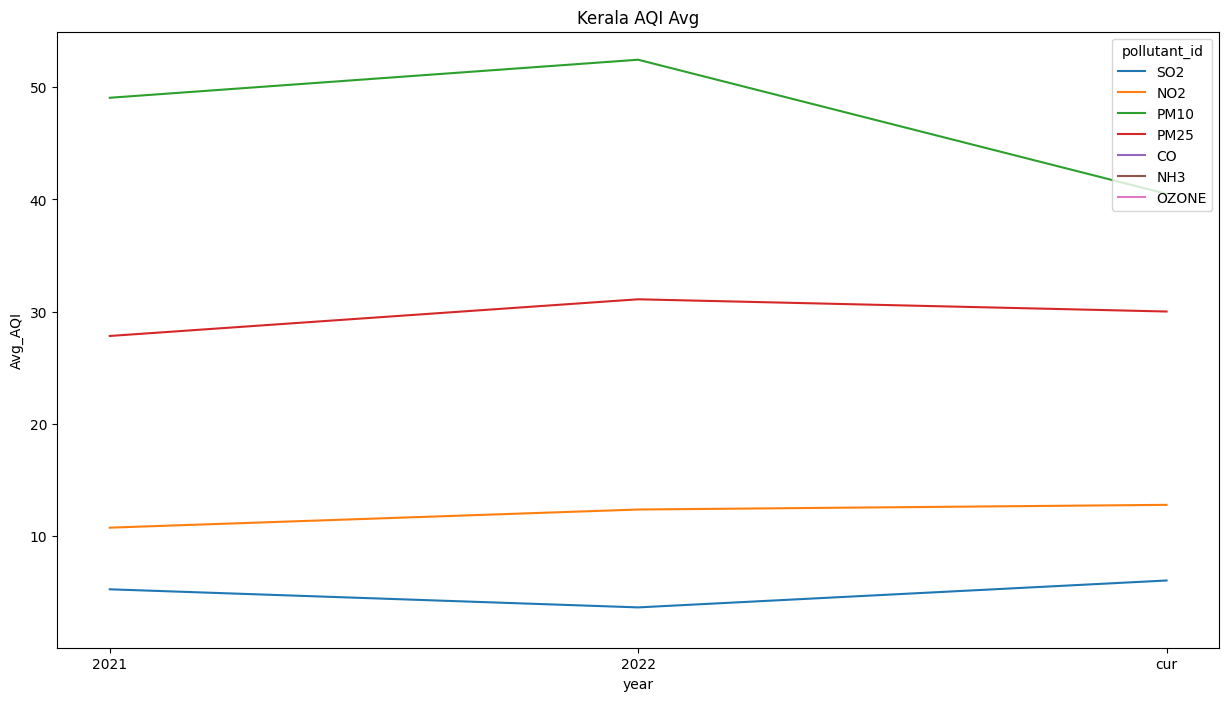

In [108]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=ti_avg[ti_avg['state']=='Kerala'], x='year', y='Avg_AQI', hue='pollutant_id')
plt.title('Kerala AQI Avg')

C:\Users\vishn\AppData\Local\Temp\ipykernel_26304\3076377488.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(), rotation=90)
C:\Users\vishn\AppData\Local\Temp\ipykernel_26304\3076377488.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(), rotation=90)
C:\Users\vishn\AppData\Local\Temp\ipykernel_26304\3076377488.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklabels(), rotation=90)
C:\Users\vishn\AppData\Local\Temp\ipykernel_26304\3076377488.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(axis.get_xticklab

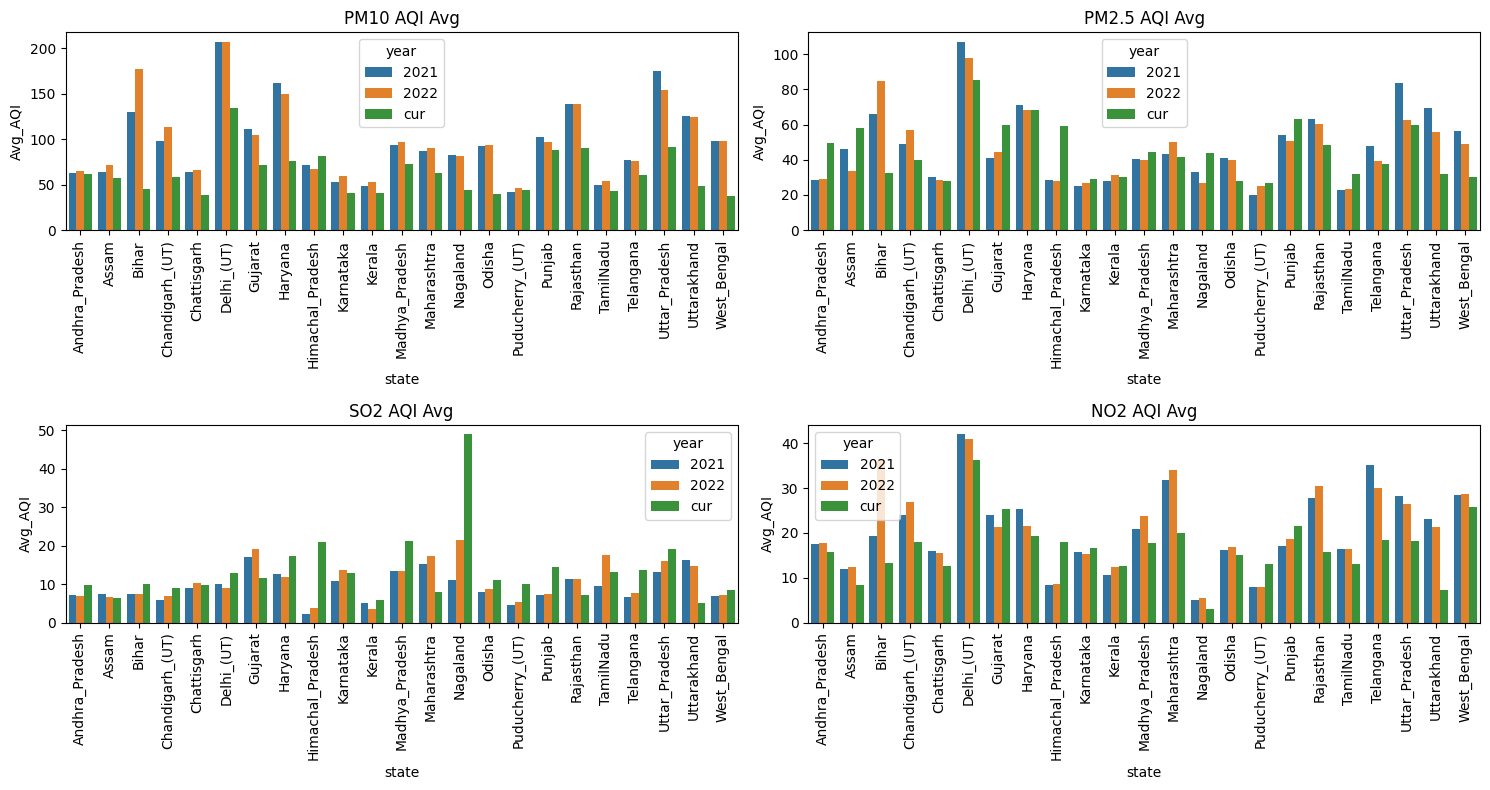

In [126]:
fig, ax = plt.subplots(2, 2, figsize=(15, 8))
sns.barplot(data=ti_avg[ti_avg['pollutant_id']=='PM10'], x='state', y='Avg_AQI', hue='year', ax = ax[0][0])
sns.barplot(data=ti_avg[ti_avg['pollutant_id']=='PM25'], x='state', y='Avg_AQI', hue='year', ax = ax[0][1])
sns.barplot(data=ti_avg[ti_avg['pollutant_id']=='SO2'], x='state', y='Avg_AQI', hue='year', ax = ax[1][0])
sns.barplot(data=ti_avg[ti_avg['pollutant_id']=='NO2'], x='state', y='Avg_AQI', hue='year', ax = ax[1][1])
t = ['NO2', 'SO2', 'PM2.5', 'PM10']
for axc in ax:
    for axis in axc:
        axis.set_xticklabels(axis.get_xticklabels(), rotation=90)
        axis.set_title(t.pop()+ ' AQI Avg')
plt.tight_layout()

#### Correlations between pollutants

In [144]:
pivot_ti_avg = ti_avg.pivot_table(index=['state', 'year'], columns='pollutant_id', values='Avg_AQI')
pivot_ti_avg.columns = ['CO', 'NH3', 'NO2', 'OZONE', 'PM10', 'PM25', 'SO2']
pivot_ti_avg.reset_index(inplace=True)
pivot_ti_avg.drop(['CO', 'NH3', 'OZONE'], axis=1, inplace=True)
display(pivot_ti_avg)

,state,year,NO2,PM10,PM25,SO2
0,Andhra_Pradesh,2021,17.562500,63.000000,28.250000,7.125000
1,Andhra_Pradesh,2022,17.875000,64.750000,28.937500,6.875000
2,Andhra_Pradesh,cur,15.857143,61.600000,49.250000,9.833333
3,Assam,2021,12.076923,63.461538,46.333333,7.538462
4,Assam,2022,12.500000,71.357143,33.846154,6.642857
...,...,...,...,...,...,...
64,Uttarakhand,2022,21.333333,124.000000,55.500000,14.666667
65,Uttarakhand,cur,7.333333,48.666667,31.666667,5.000000
66,West_Bengal,2021,28.536585,97.902439,56.100000,7.073171
67,West_Bengal,2022,28.581395,98.000000,49.222222,7.302326


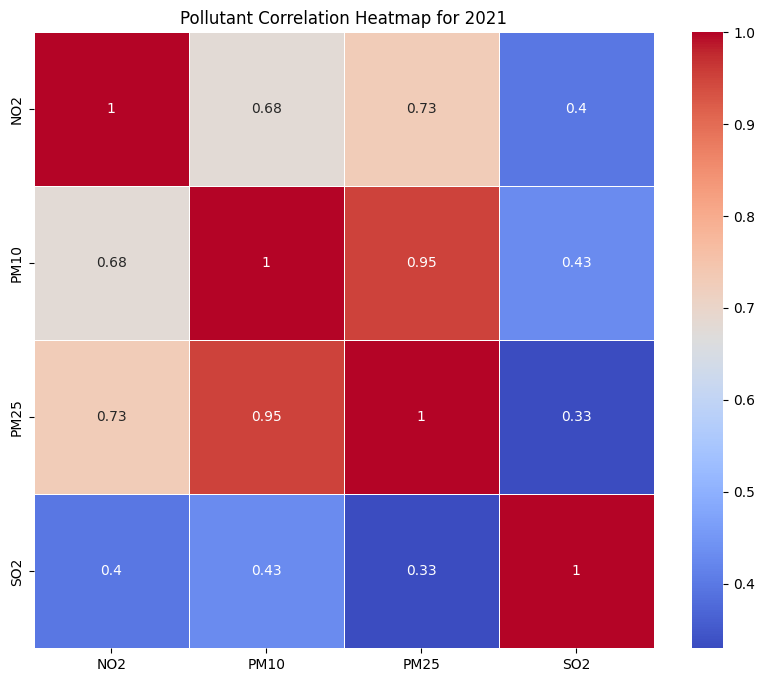

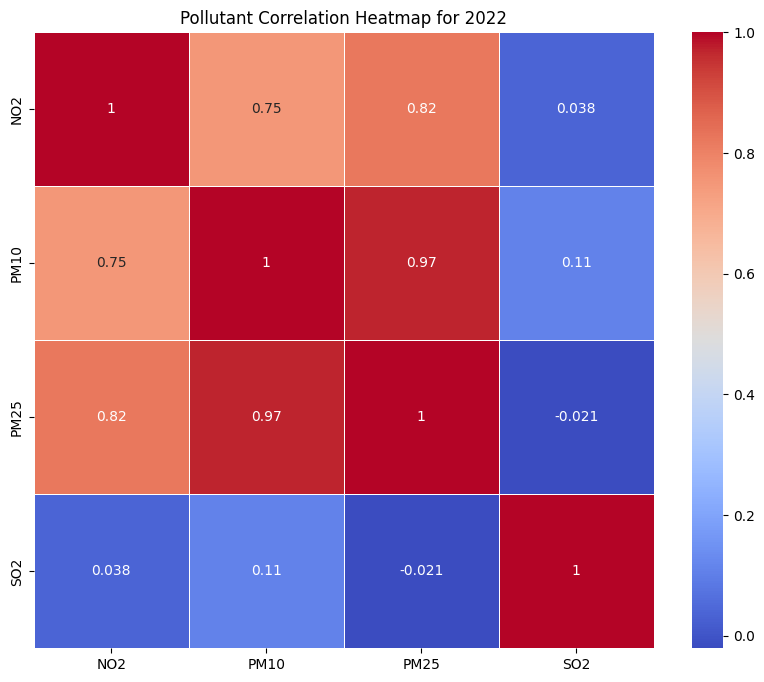

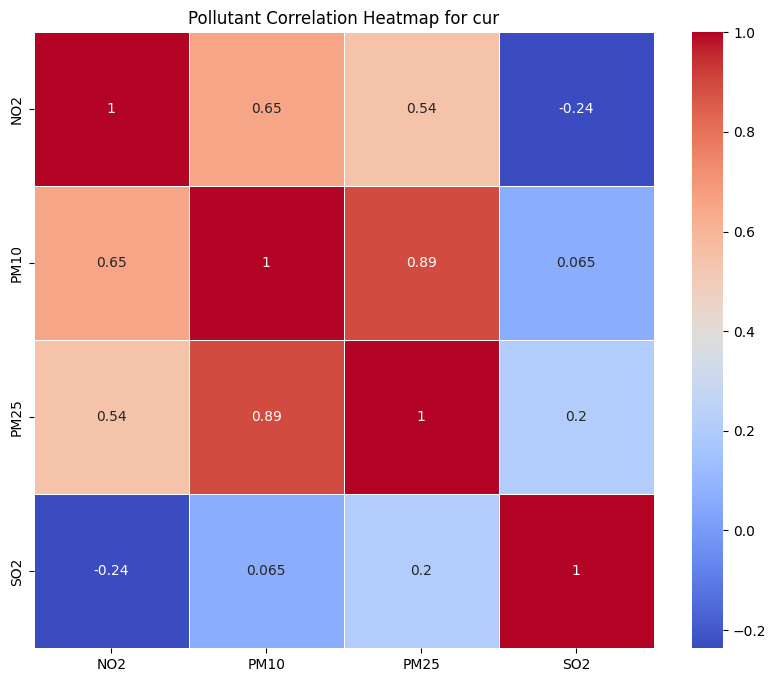

In [145]:
# Calculate correlation matrix for each year and plot heatmaps
years = pivot_ti_avg['year'].unique()

for year in years:
    year_df = pivot_ti_avg[pivot_ti_avg['year'] == year].drop(columns=['state', 'year'])
    corr_matrix = year_df.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(f'Pollutant Correlation Heatmap for {year}')
    plt.show()